# Baseline

Hello, this notebook will work as a baseline for the other ML methods. The baseline consists of LR with all the the infrared spectrum

---

In [1]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created
import numpy as np
import matplotlib.pyplot as plt
from source.roc import draw_roc 

*Read the data*

In [2]:
df = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

In [3]:
df.shape

(503, 2078)

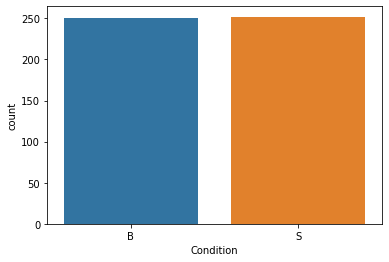

In [4]:
df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)


*Rename cols*

In [5]:
wavenumbers = np.float_(df.columns[4:])
type(wavenumbers[0])
wavelengths = (1/wavenumbers)*10**7

print(str(wavenumbers[0])+", "+ str(wavelengths[0]))
df.columns.values[4:] = np.round(wavelengths, 3)
df.head(4)

11995.49, 833.6466455309454


,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


---

*getting x, y, and the feature names*

In [6]:
df_input= df.iloc[:, 4: ]
df_input.head(2)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115


In [7]:
cols = df_input.columns # getting the names for the features

In [8]:
y = df['Condition']
y = y.map({'S': 1, 'B': 0})

---

*split the data*

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input, y, test_size = 0.3, random_state=3, stratify=y) # train and valid sets

---

*LR*

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# define the hyper-parameters
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [12]:
lr = LogisticRegression() #defining the model

In [13]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [14]:
from source.ml_acc import get_accuracy_ml

In [15]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    # for s in splits:
    #     X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for i in range(1):
        print(Xtrain.head(2))
        xtr =  Xtrain
        xte =  Xtest
        results = get_accuracy_ml (m[0], m[2], par, xtr.values, np.array(Ytrain), xte.values, np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+", all"
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

     833.647   833.915   834.183   834.451   834.720   834.989   835.258   \
210 -0.125397 -0.126011 -0.126394 -0.126276 -0.125580 -0.124976 -0.124686   
266  0.262030  0.262240  0.261925  0.261489  0.261528  0.261758  0.261956   

     835.527   835.796   836.066   ...  2478.624  2480.996  2483.372  \
210 -0.124039 -0.123105 -0.122774  ...  0.932776  0.932282  0.923896   
266  0.262196  0.262242  0.262279  ...  1.054475  1.051825  1.049572   

     2485.753  2488.138  2490.529  2492.924  2495.323  2497.727  2500.136  
210  0.921005  0.926535  0.928333  0.925304  0.922344  0.919004  0.921112  
266  1.047850  1.047667  1.049798  1.049617  1.047948  1.053028  1.059990  

[2 rows x 2074 columns]


In [16]:
print(ml_dicts)

{'lr': {'lr, all': {'tot_acc': 0.8181818181818182, 'jack_train': [0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8202247191011236, 0.8181818181818182, 0.8181818181818182, 0.8089887640449438, 0.8181818181818182, 0.8181818181818182, 0.8160919540229885, 0.8160919540229885, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8160919540229885, 0.8181818181818182, 0.8045977011494253, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.818181818181

In [17]:
import json

In [18]:
with open('base.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [20]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])  

In [21]:
print(arr_all)

[[['lr, all'], [0.8181818181818182], [0.03540929321060176]]]
